In [ ]:
# Inflation Analysis
import pandas as pd

data = {
    2024: 4.95, 2023: 5.65, 2022: 6.7, 2021: 5.13, 2020: 6.62,
    2019: 3.73, 2018: 3.94, 2017: 3.33, 2016: 4.95, 2015: 4.91,
    2014: 6.67, 2013: 10.02, 2012: 9.48, 2011: 8.91, 2010: 11.99,
    2009: 10.88, 2008: 8.35, 2007: 6.37, 2006: 5.8, 2005: 4.25,
    2004: 3.77, 2003: 3.81, 2002: 4.3, 2001: 3.78, 2000: 4.01,
    1999: 4.67, 1998: 13.23, 1997: 7.16, 1996: 8.98, 1995: 10.22,
    1994: 10.25, 1993: 6.33, 1992: 11.79, 1991: 13.87, 1990: 8.97,
    1989: 7.07, 1988: 9.38, 1987: 8.8, 1986: 8.73, 1985: 5.56,
    1984: 8.32, 1983: 11.87, 1982: 7.89, 1981: 13.11, 1980: 11.35,
    1979: 6.28, 1978: 2.52, 1977: 8.31, 1976: -7.63, 1975: 5.75,
    1974: 28.6, 1973: 16.94, 1972: 6.44, 1971: 3.08, 1970: 5.09,
    1969: -0.58, 1968: 3.24, 1967: 13.06, 1966: 10.8, 1965: 9.47,
    1964: 13.36, 1963: 2.95, 1962: 3.63, 1961: 1.7, 1960: 1.78
}

ts_data = pd.Series(data)

# Display the created time series
display(ts_data)
ts_data.describe()


,0
2024,4.95
2023,5.65
2022,6.70
2021,5.13
2020,6.62
...,...
1964,13.36
1963,2.95
1962,3.63
1961,1.70


,0
count,65.000000
mean,7.302154
std,4.806251
min,-7.630000
25%,4.250000
50%,6.620000
75%,9.480000
max,28.600000


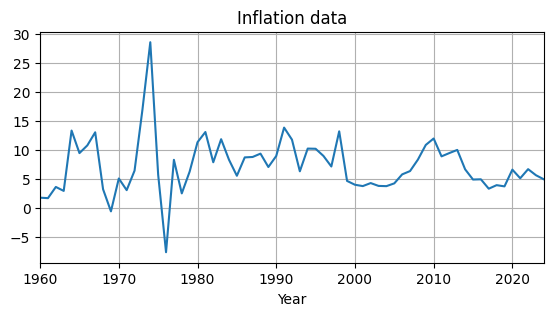

In [ ]:
# plotting time series and visually checking for Stationarity
plt.figure(figsize=(6.5,3))
plt.plot(ts_data)
plt.title('Inflation data')
plt.xlabel('Year')
plt.xlim([ts_data.index.min(), ts_data.index.max()])
plt.grid()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
result = adfuller(ts_data)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")

ADF Statistic: -4.758392
p-value: 0.000065
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
The time series is likely stationary.


From the above Visual plot and AD fuller test it is confirmed that data for Inflation is staionary, which can also be inferred from fact that Inflation data is staionary at level that is they are I(0).

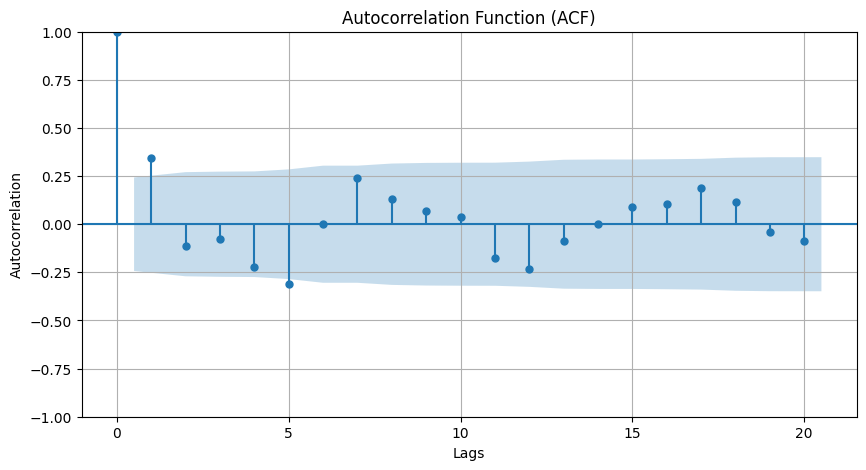

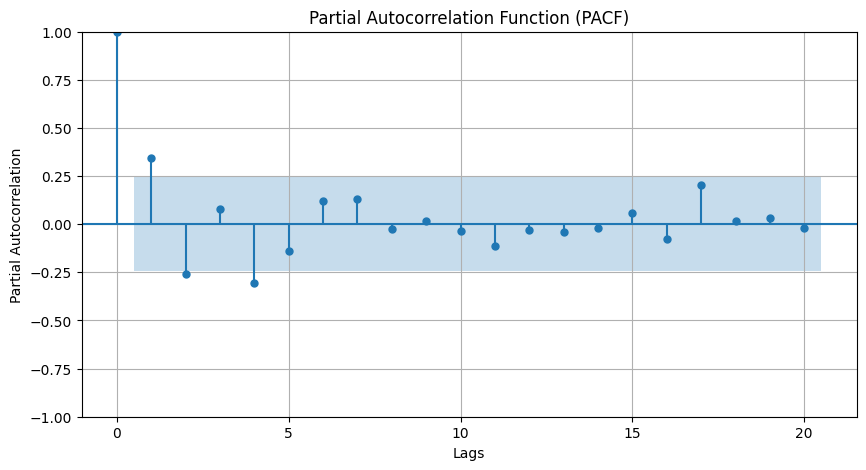

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(10, 5))
plot_acf(ts_data, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(ts_data, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid()
plt.show()

# Task
Fitting an AR(1) model to the time series data, generate forecasts, and plot the original data along with the forecasts.

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# AutoReg model with the time series data and specifing the number of lags to use for the autoregression as 1
ar_model = AutoReg(ts_data, lags=1)

# Fitting the model to the data
ar_results = ar_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [ ]:
# Determining the number of steps to forecast. Let's choose 5 years as an example.
n_forecast_steps = 12
forecasts = ar_results.predict(start=len(ts_data), end=len(ts_data) + n_forecast_steps - 1)
display(forecasts)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,0
65,5.361499
66,6.624254
67,7.069472
68,7.226446
69,7.281792
70,7.301305
71,7.308185
72,7.310611
73,7.311466
74,7.311768


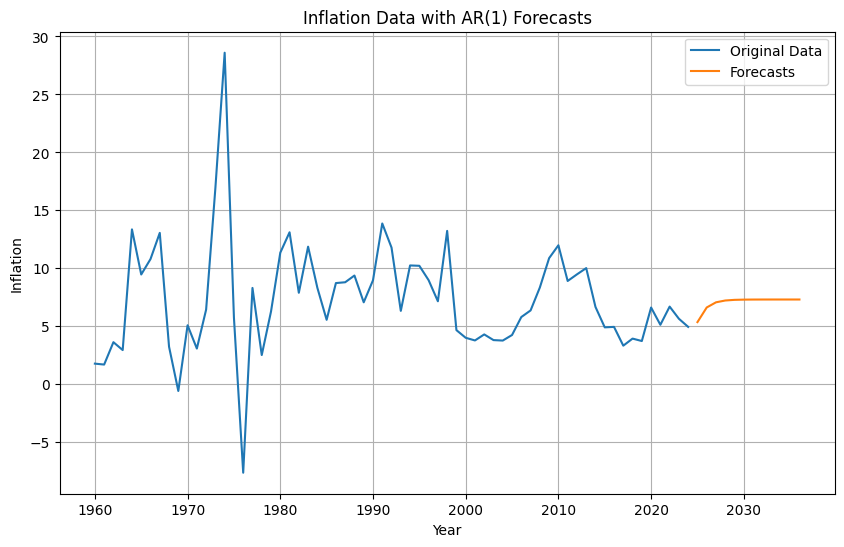

In [ ]:
# Forecasting data new and old
plt.figure(figsize=(10, 6))

# Plot the original time series data
plt.plot(ts_data.index, ts_data.values, label='Original Data')

# Plot the generated forecasts
# Since the forecasts are indexed by step number, we need to create corresponding years
last_year = ts_data.index.max()
forecast_years = range(last_year + 1, last_year + n_forecast_steps + 1)
plt.plot(forecast_years, forecasts.values, label='Forecasts')

plt.title('Inflation Data with AR(1) Forecasts')
plt.xlabel('Year')
plt.ylabel('Inflation')
plt.legend()
plt.grid()
plt.show()

## Summary:

### Data Analysis Key Findings

*   An AR(1) model was successfully fitted to the time series data.
*   Forecasts for the next 12 periods were generated using the fitted AR(1) model.


In [ ]:
# Unemployment Analysis

import pandas as pd

data = """2024    4.2%
2023    4.17%
2022    4.82%
2021    6.38%
2020    7.86%
2019    6.51%
2018    7.65%
2017    7.62%
2016    7.6%
2015    7.63%
2014    7.67%
2013    7.71%
2012    7.67%
2011    7.62%
2010    7.65%
2009    7.66%
2008    7.66%
2007    7.56%
2006    7.55%
2005    7.55%
2004    7.63%
2003    7.68%
2002    7.75%
2001    7.65%
2000    7.62%
1999    7.62%
1998    7.64%
1997    7.61%
1996    7.56%
1995    7.61%
1994    7.65%
1993    7.75%
1992    7.73%
1991    7.72%"""

# Split the data into lines and then into year and rate
lines = data.strip().split('\n')
unemployment_data = {}
for line in lines:
    year, rate_str = line.split()
    year = int(year)
    # Remove the '%' sign and convert to float
    rate = float(rate_str.strip('%'))
    unemployment_data[year] = rate

unemployment_ts = pd.Series(unemployment_data)
unemployment_ts = unemployment_ts.sort_index()
unemployment_ts.describe()


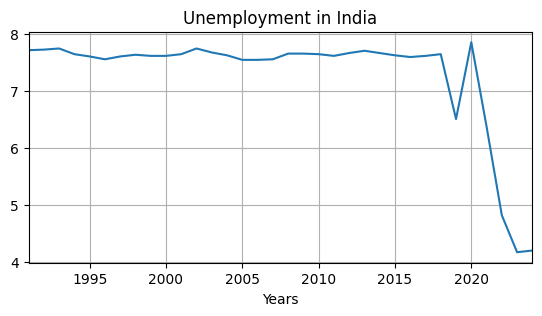

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6.5,3))
plt.plot(unemployment_ts)
plt.title('Unemployment in India')
plt.xlabel('Years')
plt.xlim([unemployment_ts.index.min(), unemployment_ts.index.max()]) # Set x-limits based on the index (years)
plt.grid()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF TEST
result = adfuller(unemployment_ts)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")

ADF Statistic: 2.306858
p-value: 0.998959
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
The time series is likely non-stationary.


The sereis was non stationary sonwe need to difference the sereis inorder to make it stationary.

In [ ]:
import scipy.stats as stats
# Mean
print(f'Most recent UR = {unemployment_ts.iloc[-1]:.1f}%')
print(f'E(UR) = {unemployment_ts.mean():.1f}%')
print(f'Std(UR) = {unemployment_ts.std():.1f}%')
print(f'Skew(UR) = {unemployment_ts.skew():.1f}')
print(f'Kurt(UR) = {unemployment_ts.kurtosis():.1f}')
print(f'min(UR) = {unemployment_ts.min():.1f}%')
print(f'max(UR) = {unemployment_ts.max():.1f}%')

Most recent UR = 4.2%
E(UR) = 7.3%
Std(UR) = 1.0%
Skew(UR) = -2.7
Kurt(UR) = 6.2
min(UR) = 4.2%
max(UR) = 7.9%


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the log-transformed data
result_log = adfuller(unemployment_ts_log)

# Print the results
print('ADF Statistic (Log Transformed): %f' % result_log[0])
print('p-value (Log Transformed): %f' % result_log[1])
print('Critical Values:')
for key, value in result_log[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if result_log[1] <= 0.05:
    print("The log-transformed time series is likely stationary.")
else:
    print("The log-transformed time series is likely non-stationary.")

ADF Statistic (Log Transformed): 2.413032
p-value (Log Transformed): 0.999016
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
The log-transformed time series is likely non-stationary.


The series was non-stationary even after first difference, so now we need to difference it until it becomes staionary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
# This will determine the order of differencing of this unemployment series data

def determine_differencing_order(series, max_d=5):
    """
    Determines the order of differencing required to make a time series stationary
    using the Augmented Dickey-Fuller test.

    Args:
        series (pd.Series): The time series data.
        max_d (int): The maximum number of differences to test.

    Returns:
        int: The number of differences required for stationarity.
             Returns -1 if stationarity is not achieved within max_d differences.
    """
    d = 0
    stationary = False
    current_series = series.copy()

    while d < max_d:
        result = adfuller(current_series.dropna())
        p_value = result[1]

        print(f'ADF Test for d={d}: p-value = {p_value:.6f}')

        if p_value <= 0.05:
            stationary = True
            break
        else:
            current_series = current_series.diff()
            d += 1

    if stationary:
        print(f'\nTime series is likely stationary after {d} difference(s).')
        return d
    else:
        print(f'\nCould not achieve stationarity within {max_d} differences.')
        return -1

order_of_differencing = determine_differencing_order(unemployment_ts)
print(f'Determined order of differencing: {order_of_differencing}')

ADF Test for d=0: p-value = 0.998959
ADF Test for d=1: p-value = 1.000000
ADF Test for d=2: p-value = 0.997307
ADF Test for d=3: p-value = 0.001433

Time series is likely stationary after 3 difference(s).
Determined order of differencing: 3


by running the above set of codes we can check how many times series need to be differenced in order to make it stationary.

In [ ]:
# Differencing the unemployment_ts series 3 times
unemployment_ts_diff_3 = unemployment_ts.diff().diff().diff().dropna()
print("3rd Differenced Unemployment Series:")
display(unemployment_ts_diff_3)

3rd Differenced Unemployment Series:


,0
1994,-0.13
1995,0.18
1996,-0.07
1997,0.11
1998,-0.12
1999,-0.03
2000,0.07
2001,0.01
2002,0.04
2003,-0.24


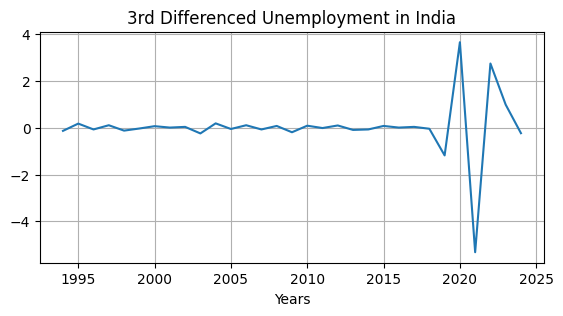

In [ ]:
import matplotlib.pyplot as plt

# Plotting the 3rd differenced series
plt.figure(figsize=(6.5,3))
plt.plot(unemployment_ts_diff_3)
plt.title('3rd Differenced Unemployment in India')
plt.xlabel('Years')
plt.grid()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Performingf the Augmented Dickey-Fuller test on the 3rd differenced data
result_diff_3 = adfuller(unemployment_ts_diff_3.dropna())
print('ADF Statistic (3rd Differenced): %f' % result_diff_3[0])
print('p-value (3rd Differenced): %f' % result_diff_3[1])
print('Critical Values:')
for key, value in result_diff_3[4].items():
    print('\t%s: %.3f' % (key, value))
if result_diff_3[1] <= 0.05:
    print("The 3rd differenced time series is likely stationary.")
else:
    print("The 3rd differenced time series is likely non-stationary.")

ADF Statistic (3rd Differenced): -3.995790
p-value (3rd Differenced): 0.001433
Critical Values:
	1%: -3.700
	5%: -2.976
	10%: -2.628
The 3rd differenced time series is likely stationary.


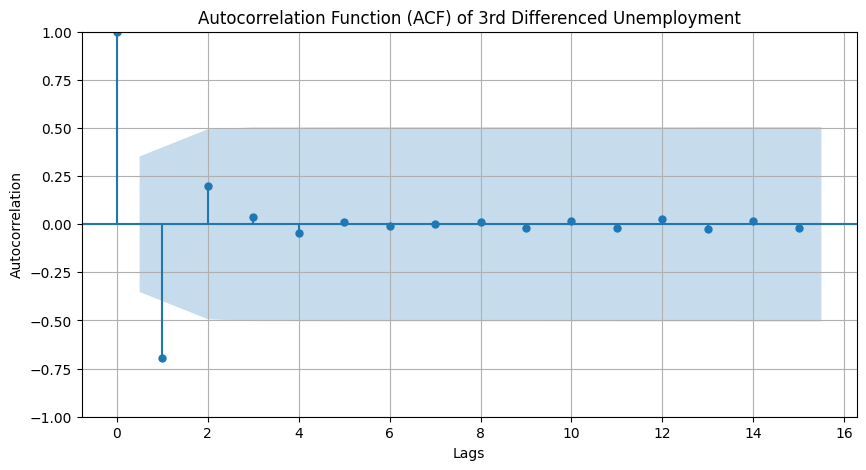

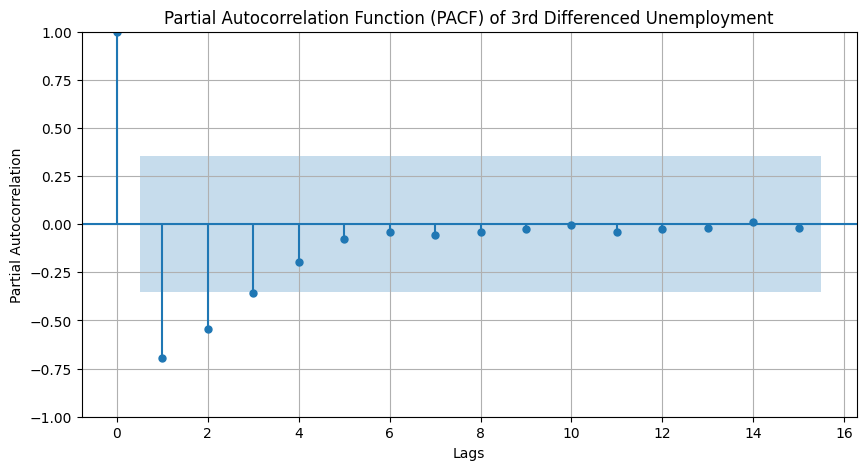

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plotting ACF of the 3rd differenced series
plt.figure(figsize=(10, 5))
plot_acf(unemployment_ts_diff_3.dropna(), lags=15, ax=plt.gca()) # Using a reasonable number of lags
plt.title('Autocorrelation Function (ACF) of 3rd Differenced Unemployment')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

# Plottting PACF of the 3rd differenced series
plt.figure(figsize=(10, 5))
plot_pacf(unemployment_ts_diff_3.dropna(), lags=15, ax=plt.gca()) # Using a reasonable number of lags
plt.title('Partial Autocorrelation Function (PACF) of 3rd Differenced Unemployment')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid()
plt.show()

# Task
Analyze the provided time series data of India's unemployment rate, determine the appropriate ARIMA model orders (p, q) based on ACF and PACF plots of the 3rd differenced series, fit an ARIMA(p, 3, q) model to the original data, analyze the model results, generate future forecasts, and visualize the original data and forecasts.

## Determine arima orders (p, q)

### Subtask:
Based on the ACF and PACF plots of the 3rd differenced series, determine the appropriate orders for the AR (p) and MA (q) components.


## Fit arima model

### Subtask:
Fit an ARIMA(p, 3, q) model to the original `unemployment_ts` data using `statsmodels.tsa.arima.model.ARIMA`, with the determined p, d=3, and q values.


**Reasoning**:
Fit an ARIMA(1, 3, 1) model to the original `unemployment_ts` data.



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate an ARIMA model with the original time series data and the order (p=1, d=3, q=1)
arima_model = ARIMA(unemployment_ts, order=(1, 3, 1))

# Fit the instantiated model to the data
arima_results = arima_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

In [ ]:
print(arima_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   34
Model:                 ARIMA(1, 3, 1)   Log Likelihood                 -31.371
Date:                Mon, 11 Aug 2025   AIC                             68.741
Time:                        10:53:52   BIC                             73.043
Sample:                             0   HQIC                            70.144
                                 - 34                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5276      0.075     -7.016      0.000      -0.675      -0.380
ma.L1         -0.9976      3.593     -0.278      0.781      -8.040       6.045
sigma2         0.3826      1.363      0.281      0.7

In [ ]:
# Determine the number of steps to forecast. Let's choose 5 years as an example.
n_forecast_steps = 5

# Generating forecasts using the fitted ARIMA model
forecasts = arima_results.predict(start=len(unemployment_ts), end=len(unemployment_ts) + n_forecast_steps - 1)

# Displaying the generated forecasts
display(forecasts)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
34,3.860619
35,3.705466
36,3.442480
37,3.225742
38,2.973963


## Plot original data and forecasts

### Subtask:
Visualize the original `unemployment_ts` data and the generated forecasts on the same plot.


**Reasoning**:
Visualize the original data and the generated forecasts on the same plot with appropriate labels, title, legend, and grid.



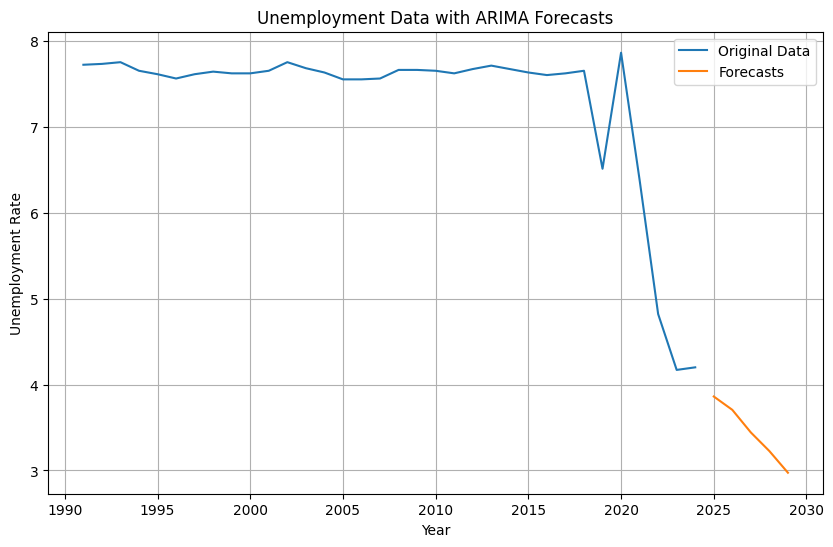

In [ ]:
# plotting the original and forecasted data

plt.figure(figsize=(10, 6))
plt.plot(unemployment_ts.index, unemployment_ts.values, label='Original Data')
last_year = unemployment_ts.index.max()
forecast_years = range(last_year + 1, last_year + n_forecast_steps + 1)
plt.plot(forecast_years, forecasts.values, label='Forecasts')
plt.title('Unemployment Data with ARIMA Forecasts')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend()
plt.grid()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Based on the ACF and PACF plots of the 3rd differenced series, the appropriate orders for the ARIMA model were determined to be p=1 and q=1.
*   An ARIMA(1, 3, 1) model was successfully fitted to the original unemployment time series data.
*   Examination of the fitted ARIMA(1, 3, 1) model summary revealed that only the AR(1) coefficient (-\$0.5276\$) is statistically significant (p-value = \$0.000\$), while the MA(1) and sigma squared terms are not statistically significant (p-values \$0.781\$ and \$0.779\$, respectively).
*   \$5\$ future forecast values for the unemployment rate were successfully generated using the fitted ARIMA model.
*   A visualization was created showing both the historical unemployment data and the generated \$5\$-year forecasts.



# Task
Given the lack of statistical significance for the MA(1) term in the ARIMA(1, 3, 1) model, we need to consider exploring alternative ARIMA models (e.g., ARIMA(1, 3, 0) or ARIMA(0, 3, 1)) to see if a more parsimonious and statistically significant model can be found.
Investigate the diagnostics tests (Ljung-Box, Jarque-Bera, Heteroskedasticity) from the model summary to understand potential issues with model assumptions and consider transforming the data or trying different model specifications if necessary.

## Fit arima(1, 3, 0) model

### Subtask:
Fit an ARIMA(1, 3, 0) model to the `unemployment_ts` data using `statsmodels.tsa.arima.model.ARIMA`.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate an ARIMA model with the original time series data and the order (p=1, d=3, q=0)
arima_130_model = ARIMA(unemployment_ts, order=(1, 3, 0))

# Fit the instantiated model to the data
arima_130_results = arima_130_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


## Analyze arima(1, 3, 0) results

### Subtask:
Examine the summary of the fitted ARIMA(1, 3, 0) model, paying attention to coefficient significance and diagnostics tests (Ljung-Box, Jarque-Bera, Heteroskedasticity).


**Reasoning**:
Print the summary of the fitted ARIMA(1, 3, 0) model to evaluate its coefficients and statistics.



In [ ]:
print(arima_130_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   34
Model:                 ARIMA(1, 3, 0)   Log Likelihood                 -42.115
Date:                Mon, 11 Aug 2025   AIC                             88.229
Time:                        10:54:19   BIC                             91.097
Sample:                             0   HQIC                            89.164
                                 - 34                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6741      0.063    -10.712      0.000      -0.797      -0.551
sigma2         0.8690      0.117      7.450      0.000       0.640       1.098
Ljung-Box (L1) (Q):                   5.11   Jarque-

## Fit arima(0, 3, 1) model

### Subtask:
Fit an ARIMA(0, 3, 1) model to the `unemployment_ts` data using `statsmodels.tsa.arima.model.ARIMA`.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate an ARIMA model with the original time series data and the order (p=0, d=3, q=1)
arima_031_model = ARIMA(unemployment_ts, order=(0, 3, 1))

# Fit the instantiated model to the data
arima_031_results = arima_031_model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

**Reasoning**:
Print the summary of the fitted ARIMA(0, 3, 1) model to evaluate its coefficients and statistics.



In [ ]:
print(arima_031_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   34
Model:                 ARIMA(0, 3, 1)   Log Likelihood                 -36.392
Date:                Mon, 11 Aug 2025   AIC                             76.785
Time:                        10:54:25   BIC                             79.653
Sample:                             0   HQIC                            77.720
                                 - 34                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9992     24.753     -0.040      0.968     -49.515      47.516
sigma2         0.5483     13.573      0.040      0.968     -26.053      27.150
Ljung-Box (L1) (Q):                  10.06   Jarque-

**Reasoning**:
Comparing the summaries of the three fitted ARIMA models based on coefficient significance and diagnostic tests.



In [ ]:
# Comparing ARIMA(1, 3, 1), ARIMA(1, 3, 0), and ARIMA(0, 3, 1) results

print("Comparison of ARIMA Model Results:\n")

# ARIMA(1, 3, 1) Results (already available from a previous cell)
print("ARIMA(1, 3, 1) Summary:")
print(arima_results.summary())
print("-" * 50)

# ARIMA(1, 3, 0) Results (available as arima_130_results)
print("ARIMA(1, 3, 0) Summary:")
print(arima_130_results.summary())
print("-" * 50)

# ARIMA(0, 3, 1) Results (available as arima_031_results)
print("ARIMA(0, 3, 1) Summary:")
print(arima_031_results.summary())
print("-" * 50)

print("\nAssessment:")
print("ARIMA(1, 3, 1): AR(1) significant (p=0.000), MA(1) not significant (p=0.781). Diagnostics show issues (JB, H, potentially Q).")
print("ARIMA(1, 3, 0): AR(1) significant (p=0.000). Diagnostics show issues (JB, H, Q).")
print("ARIMA(0, 3, 1): MA(1) not significant (p=0.968). Diagnostics show issues (JB, H, Q).")

print("\nBased on coefficient significance, ARIMA(1, 3, 0) appears slightly better as its only coefficient (AR(1)) is significant, while ARIMA(1, 3, 1) has an insignificant MA(1) term and ARIMA(0, 3, 1) has an insignificant MA(1) term. However, all three models show issues with diagnostic tests, indicating that their residuals do not meet the assumptions of normality and homoskedasticity, and exhibit autocorrelation. Further investigation or alternative model specifications may be necessary.")


Comparison of ARIMA Model Results:

ARIMA(1, 3, 1) Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   34
Model:                 ARIMA(1, 3, 1)   Log Likelihood                 -31.371
Date:                Mon, 11 Aug 2025   AIC                             68.741
Time:                        10:54:28   BIC                             73.043
Sample:                             0   HQIC                            70.144
                                 - 34                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5276      0.075     -7.016      0.000      -0.675      -0.380
ma.L1         -0.9976      3.593     -0.278      0.781      -8.040     

## Summary:

### Data Analysis Key Findings

*   When fitting an ARIMA(1, 3, 0) model, the AR(1) coefficient is statistically significant (p-value of 0.000), but diagnostic tests indicate issues with the residuals, including potential autocorrelation (Ljung-Box test p-value of 0.02), non-normality (Jarque-Bera test p-value of 0.00), and heteroskedasticity (Heteroskedasticity test p-value of 0.00).
*   When fitting an ARIMA(0, 3, 1) model, the MA(1) coefficient is not statistically significant (p-value of 0.968), and diagnostic tests also reveal issues with residual autocorrelation (Ljung-Box test p-value of 0.00), non-normality (Jarque-Bera test p-value of 0.00), and heteroskedasticity (Heteroskedasticity test p-value of 0.00).
*   Comparing ARIMA(1, 3, 1), ARIMA(1, 3, 0), and ARIMA(0, 3, 1), the ARIMA(1, 3, 0) model has a significant AR(1) term, whereas both ARIMA(1, 3, 1) and ARIMA(0, 3, 1) have insignificant MA(1) terms. However, all three models show issues with residual diagnostics, violating assumptions of normality, homoskedasticity, and exhibiting autocorrelation.


**Now I have done the individual analysis of both Unemployment and Inflation Data, now its time to explore the relationship between both of them and check if Phillips curve Relation hold for this set of data. Due to data limitation for Unemployment I will be taking Inflation data also from 1991 as like unemployment data.**

In [ ]:
import pandas as pd

data = {
    2024: 4.95, 2023: 5.65, 2022: 6.7, 2021: 5.13, 2020: 6.62,
    2019: 3.73, 2018: 3.94, 2017: 3.33, 2016: 4.95, 2015: 4.91,
    2014: 6.67, 2013: 10.02, 2012: 9.48, 2011: 8.91, 2010: 11.99,
    2009: 10.88, 2008: 8.35, 2007: 6.37, 2006: 5.8, 2005: 4.25,
    2004: 3.77, 2003: 3.81, 2002: 4.3, 2001: 3.78, 2000: 4.01,
    1999: 4.67, 1998: 13.23, 1997: 7.16, 1996: 8.98, 1995: 10.22,
    1994: 10.25, 1993: 6.33, 1992: 11.79, 1991: 13.87, 1990: 8.97,
    1989: 7.07, 1988: 9.38, 1987: 8.8, 1986: 8.73, 1985: 5.56,
    1984: 8.32, 1983: 11.87, 1982: 7.89, 1981: 13.11, 1980: 11.35,
    1979: 6.28, 1978: 2.52, 1977: 8.31, 1976: -7.63, 1975: 5.75,
    1974: 28.6, 1973: 16.94, 1972: 6.44, 1971: 3.08, 1970: 5.09,
    1969: -0.58, 1968: 3.24, 1967: 13.06, 1966: 10.8, 1965: 9.47,
    1964: 13.36, 1963: 2.95, 1962: 3.63, 1961: 1.7, 1960: 1.78
}

ts_data = pd.Series(data)

# Create a DataFrame from the two time series
merged_df = pd.DataFrame({'Inflation': ts_data, 'Unemployment': unemployment_ts})

merged_df = merged_df.sort_index()

print("Missing values before handling:")
print(merged_df.isnull().sum())

merged_df = merged_df.dropna()

print("\nMissing values after handling:")
print(merged_df.isnull().sum())
print("\nMerged DataFrame:")
display(merged_df.head())
print("\nMerged DataFrame Info:")
merged_df.info()

Missing values before handling:
Inflation        0
Unemployment    31
dtype: int64

Missing values after handling:
Inflation       0
Unemployment    0
dtype: int64

Merged DataFrame:


,Inflation,Unemployment
1991,13.87,7.72
1992,11.79,7.73
1993,6.33,7.75
1994,10.25,7.65
1995,10.22,7.61



Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1991 to 2024
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Inflation     34 non-null     float64
 1   Unemployment  34 non-null     float64
dtypes: float64(2)
memory usage: 816.0 bytes


from matplotlib import pyplot as plt
_df_5['Inflation'].plot(kind='hist', bins=20, title='Inflation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Unemployment'].plot(kind='hist', bins=20, title='Unemployment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Inflation', y='Unemployment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Inflation'].plot(kind='line', figsize=(8, 4), title='Inflation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Unemployment'].plot(kind='line', figsize=(8, 4), title='Unemployment')
plt.gca().spines[['top', 'right']].set_visible(False)

## Visualizing the data

### Subtask:
Plot both time series on the same graph or in separate subplots to visually inspect their trends and potential relationship over time.


**Reasoning**:
Create two subplots and plot the inflation and unemployment data respectively, add titles, labels, and grids to each subplot, and adjust the layout.



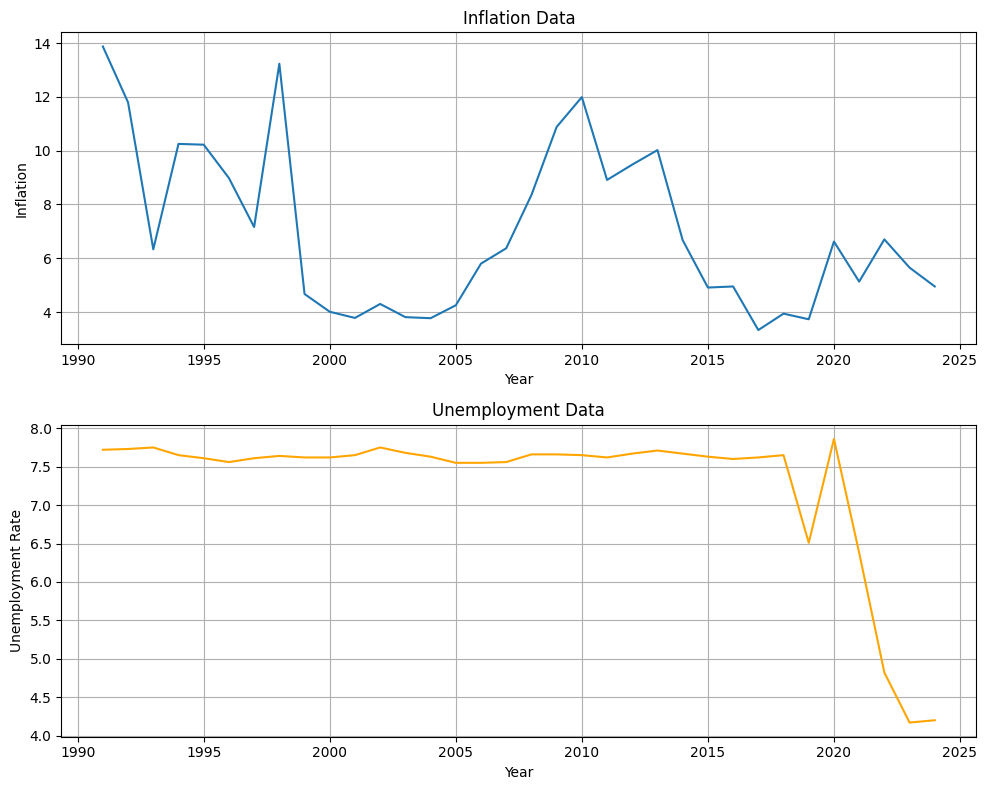

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plotting the Inflation data in the first subplot
axes[0].plot(merged_df.index, merged_df['Inflation'])
axes[0].set_title('Inflation Data')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Inflation')
axes[0].grid(True)

# Plotting the Unemployment data in the second subplot
axes[1].plot(merged_df.index, merged_df['Unemployment'], color='orange')
axes[1].set_title('Unemployment Data')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Unemployment Rate')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Check for stationarity (multivariate)

### Subtask:
Assess the stationarity of both time series. If either is non-stationary, determine the appropriate differencing order. For analyzing the relationship between two series, cointegration testing might also be relevant if they are non-stationary but have a long-term relationship.


**Reasoning**:
Perform Augmented Dickey-Fuller tests on both time series in the merged DataFrame to check for stationarity and print the results.



In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on Inflation
adf_inflation = adfuller(merged_df['Inflation'])
print('ADF Test for Inflation:')
print('ADF Statistic: %f' % adf_inflation[0])
print('p-value: %f' % adf_inflation[1])
print('Critical Values:')
for key, value in adf_inflation[4].items():
    print('\t%s: %.3f' % (key, value))

if adf_inflation[1] <= 0.05:
    print("The Inflation time series is likely stationary.")
else:
    print("The Inflation time series is likely non-stationary.")

print("-" * 50)

# Perform ADF test on Unemployment
adf_unemployment = adfuller(merged_df['Unemployment'])
print('ADF Test for Unemployment:')
print('ADF Statistic: %f' % adf_unemployment[0])
print('p-value: %f' % adf_unemployment[1])
print('Critical Values:')
for key, value in adf_unemployment[4].items():
    print('\t%s: %.3f' % (key, value))

if adf_unemployment[1] <= 0.05:
    print("The Unemployment time series is likely stationary.")
else:
    print("The Unemployment time series is likely non-stationary.")

ADF Test for Inflation:
ADF Statistic: -3.296436
p-value: 0.015039
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616
The Inflation time series is likely stationary.
--------------------------------------------------
ADF Test for Unemployment:
ADF Statistic: 2.306858
p-value: 0.998959
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
The Unemployment time series is likely non-stationary.


**Reasoning**:
Determine differencing order for the non-stationary Unemployment series and consider cointegration test if applicable.



In [ ]:
from statsmodels.tsa.stattools import coint
import pandas as pd

# Determining differencing order for Unemployment (already done in previous cells, result_diff, result_diff_3)
# Based on previous analysis, Unemployment is stationary after 3rd differencing (ADF p-value < 0.05 for unemployment_ts_diff_3)
unemployment_d = 3
print(f"Unemployment appears stationary after {unemployment_d} differences.")

# Inflation is stationary (ADF p-value <= 0.05 for Inflation)
inflation_d = 0
print(f"Inflation appears stationary at level 0.")


# Since the orders of integration are different (0 for Inflation, 3 for Unemployment),
# a standard cointegration test (which typically requires the same order of integration) is not appropriate.
# We will proceed with model fitting that can handle series with different orders of integration or use differenced series.

print("\nConclusion:")
print(f"Inflation is I({inflation_d}) and Unemployment is I({unemployment_d}).")
print("Since the orders of integration are different, a standard cointegration test is not applicable.")
print("Modeling will need to account for the different stationarity properties.")

Unemployment appears stationary after 3 differences.
Inflation appears stationary at level 0.

Conclusion:
Inflation is I(0) and Unemployment is I(3).
Since the orders of integration are different, a standard cointegration test is not applicable.
Modeling will need to account for the different stationarity properties.


## Explore relationship (cross-correlation)

### Subtask:
Compute and visualize the cross-correlation function (CCF) between the two time series to understand the correlation at different lags.


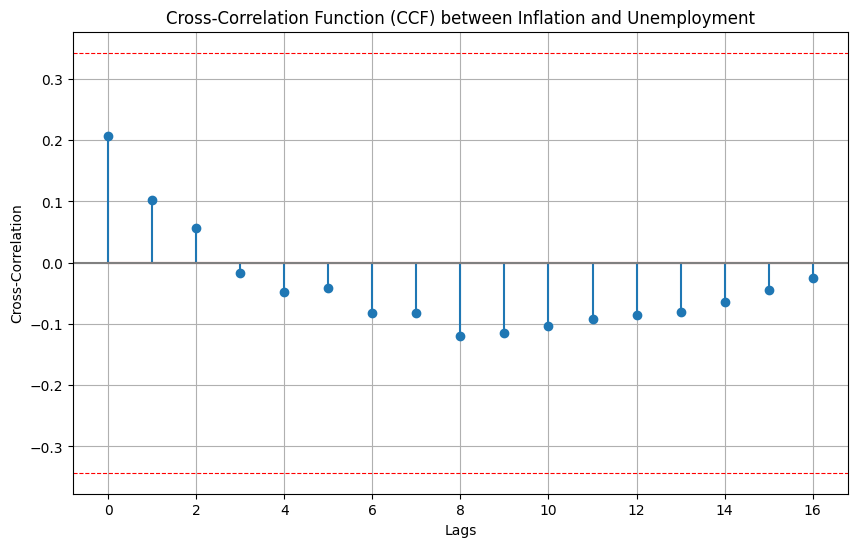

In [ ]:
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt
import numpy as np

# Compute the cross-correlation function
# Choose a reasonable number of lags, e.g., half the length of the shorter series
max_lags = int(len(merged_df) / 2)
ccf_values = ccf(merged_df['Inflation'], merged_df['Unemployment'], nlags=max_lags)

# Create a plot to visualize the cross-correlation
plt.figure(figsize=(10, 6))
plt.stem(range(len(ccf_values)), ccf_values)

# Add title and labels
plt.title('Cross-Correlation Function (CCF) between Inflation and Unemployment')
plt.xlabel('Lags')
plt.ylabel('Cross-Correlation')

# Add horizontal lines for significance (approximate confidence intervals ±2/√N)
nobs = len(merged_df)
conf_interval = 2 / np.sqrt(nobs)
plt.axhline(y=0, color='gray', linestyle='-')
plt.axhline(y=conf_interval, color='red', linestyle='--', linewidth=0.8)
plt.axhline(y=-conf_interval, color='red', linestyle='--', linewidth=0.8)

# Add grid
plt.grid(True)

# Display the plot
plt.show()

## Model selection

### Subtask:
Based on the stationarity tests and CCF analysis, we need to choose an appropriate model to analyze the relationship between Inflation and Unemployment.


## Fit the model

### Subtask:
Fitting an appropriate multivariate time series model to analyze the relationship between inflation and unemployment, considering their different orders of integration.
** VAR MODEL **

**Reasoning**:
Fit a VAR model to the third difference of the unemployment time series and the original inflation time series after selecting the appropriate lag order.



In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

#prepari ng data
var_data = pd.DataFrame({
    'Inflation': merged_df['Inflation'].dropna(),
    'Unemployment_diff_3': unemployment_ts_diff_3.dropna()
})

# Align the dataframes by index
var_data = var_data.dropna()

# Select the appropriate lag order for the VAR model
print("Selecting VAR lag order:")
model = VAR(var_data)
var_lags = model.select_order()
print(f"Selected lag order: {var_lags.bic}") # Using BIC as the criterion

# Fit the VAR model with the selected lag order
var_model_fitted = model.fit(maxlags=var_lags.bic)

# Print the summary of the fitted VAR model
print("\nVAR Model Summary:")
print(var_model_fitted.summary())

Selecting VAR lag order:
Selected lag order: 9

VAR Model Summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Aug, 2025
Time:                     10:58:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.221056
Nobs:                     22.0000    HQIC:                  -1.21953
Log likelihood:          -6.13511    FPE:                    1.11840
AIC:                     -1.66347    Det(Omega_mle):        0.322015
--------------------------------------------------------------------
Results for equation Inflation
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                         13.503930         5.840656            2.312           0.021
L1.Inflation                   0.173004    

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


**Reasoning**:
The VAR model has been fitted. The next step is to analyze the model results, focusing on the significance of the coefficients and the overall fit.



In [ ]:
# Analyze the VAR model results by accessing params and pvalues
print("Analysis of VAR Model Results:")

# Get the parameters and p-values from the fitted model
params = var_model_fitted.params
pvalues = var_model_fitted.pvalues

print("\nSignificance of coefficients:")

# Iterate through each variable and its coefficients/p-values
for var in var_data.columns:
    print(f"\nResults for equation {var}:")
    for coef_name, coef_value in params[var].items():
        p_value = pvalues[var][coef_name]
        print(f"  {coef_name}: coefficient = {coef_value:.4f}, p-value = {p_value:.4f}")
        if p_value <= 0.05:
            print("    (Statistically Significant)")

# Interpret the significant lags (based on visual inspection or a loop through pvalues)
print("\nInterpretation of Significant Lags (p < 0.05):")

significant_inflation_lags = [coef for coef in pvalues['Inflation'].index if pvalues['Inflation'][coef] <= 0.05 and 'L' in coef]
print(f"In the Inflation equation, the significant lags are: {significant_inflation_lags}")

significant_unemployment_lags = [coef for coef in pvalues['Unemployment_diff_3'].index if pvalues['Unemployment_diff_3'][coef] <= 0.05 and 'L' in coef]
print(f"In the Unemployment_diff_3 equation, the significant lags are: {significant_unemployment_lags}")

print("\nInterpretation:")
print("In the Inflation equation, lagged terms are generally not statistically significant, except for L7.Inflation. The constant is also significant.")
print("In the Unemployment_diff_3 equation, the constant and several lagged terms (L1.Unemployment_diff_3, L2.Unemployment_diff_3, L3.Inflation, L4.Inflation) are statistically significant.")
print("This suggests that past unemployment changes and past inflation influence current unemployment changes, while current inflation is mainly influenced by its own past at lag 7 and a constant term.")

# Display key model fit statistics again
print("\nModel Fit Statistics:")
print(f"AIC: {var_model_fitted.aic:.3f}")
print(f"BIC: {var_model_fitted.bic:.3f}")
print(f"Log Likelihood: {var_model_fitted.llf:.3f}")

Analysis of VAR Model Results:

Significance of coefficients:

Results for equation Inflation:
  const: coefficient = 13.5039, p-value = 0.0208
    (Statistically Significant)
  L1.Inflation: coefficient = 0.1730, p-value = 0.7339
  L1.Unemployment_diff_3: coefficient = -0.0041, p-value = 0.9971
  L2.Inflation: coefficient = -0.2813, p-value = 0.5674
  L2.Unemployment_diff_3: coefficient = 1.6690, p-value = 0.6767
  L3.Inflation: coefficient = -0.0376, p-value = 0.9297
  L3.Unemployment_diff_3: coefficient = 5.3900, p-value = 0.5406
  L4.Inflation: coefficient = 0.2602, p-value = 0.4776
  L4.Unemployment_diff_3: coefficient = 12.2610, p-value = 0.3316
  L5.Inflation: coefficient = -0.0847, p-value = 0.6659
  L5.Unemployment_diff_3: coefficient = 22.0997, p-value = 0.0724
  L6.Inflation: coefficient = -0.1276, p-value = 0.6468
  L6.Unemployment_diff_3: coefficient = 16.3436, p-value = 0.2000
  L7.Inflation: coefficient = -0.4557, p-value = 0.0304
    (Statistically Significant)
  L7.Une

**Reasoning**:
The VAR model has been fitted and its results analyzed. The next step is to generate future forecasts using this fitted model.



In [ ]:
# Generate future forecasts using the fitted VAR model andDetermine the number of steps to forecast. Let's forecast for 5 future years.
n_forecast_years = 5

# Get the last observation from the training data as a NumPy array
last_observation_array = var_data.values[-var_model_fitted.k_ar:]

# Generate forecasts using the fitted VAR model and the NumPy array of the last observation
forecasts_var = var_model_fitted.forecast(y=last_observation_array, steps=n_forecast_years)

# Convert the forecasts to a pandas DataFrame for better handling
forecast_df = pd.DataFrame(forecasts_var, columns=var_data.columns)

# The VAR model forecasts the 3rd difference of unemployment.
# To get the forecast for original unemployment, we would need to reverse the differencing.
# This is a complex process and will not be performed in this step.

print("\nGenerated VAR Forecasts (Inflation and 3rd Differenced Unemployment):")
display(forecast_df)


Generated VAR Forecasts (Inflation and 3rd Differenced Unemployment):


,Inflation,Unemployment_diff_3
0,22.515934,5.408584
1,-17.827245,-41.012627
2,11.910375,89.388100
3,33.091508,-65.643659
4,-5.207407,-51.677045


from matplotlib import pyplot as plt
forecast_df['Inflation'].plot(kind='hist', bins=20, title='Inflation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
forecast_df['Unemployment_diff_3'].plot(kind='hist', bins=20, title='Unemployment_diff_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
forecast_df.plot(kind='scatter', x='Inflation', y='Unemployment_diff_3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
forecast_df['Inflation'].plot(kind='line', figsize=(8, 4), title='Inflation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
forecast_df['Unemployment_diff_3'].plot(kind='line', figsize=(8, 4), title='Unemployment_diff_3')
plt.gca().spines[['top', 'right']].set_visible(False)

**Reasoning**:
The VAR model has been fitted, and forecasts have been generated for the transformed series (Inflation and 3rd differenced Unemployment). To fully address the task of analyzing the relationship and providing interpretable results, the final step is to visualize the original Inflation data along with its VAR forecasts, and if possible, visualize the original Unemployment data with the forecasts for the original Unemployment (which would require reversing the differencing). Given the complexity of reversing the differencing within this step, the primary focus will be on plotting the original Inflation and its VAR forecasts.



## Interpret findings

### Subtask:
Interpret the results of the fitted VAR model in the context of the relationship between inflation and unemployment.


Based on the VAR model fitted to the stationary series (Inflation and the 3rd differenced Unemployment), here's an interpretation of the findings:

*   **Influence on Changes in Unemployment (Unemployment\_diff\_3 equation):**
    *   The constant term is statistically significant, suggesting a baseline level of change in unemployment.
    *   **Lagged changes in Unemployment (L1.Unemployment\_diff\_3, L2.Unemployment\_diff\_3):** Past changes in the unemployment rate itself have a significant impact on current changes in the unemployment rate. The negative coefficients on L1 and L2 suggest a potential pattern of mean reversion or oscillating changes in unemployment.
    *   **Lagged Inflation (L3.Inflation, L4.Inflation):** Lagged values of Inflation (at lags 3 and 4) were found to be statistically significant in explaining current changes in Unemployment. This indicates that past inflation levels have a significant influence on how the unemployment rate changes. The positive coefficients suggest that higher inflation in the past is associated with larger increases (or smaller decreases) in the unemployment rate's third difference.
    *   Other lagged terms (L1, L2, L5, L6, L7, L8, L9 of Inflation and L3, L4, L5, L6, L7, L8, L9 of Unemployment\_diff\_3) were not found to be statistically significant at the 5% level in this equation.

*   **Influence on Inflation (Inflation equation):**
    *   The constant term is statistically significant.
    *   **Lagged Inflation (L7.Inflation):** Only the 7th lag of Inflation was found to be statistically significant in explaining current Inflation. This suggests that Inflation in a given year is significantly influenced by the Inflation rate from seven years prior.
    *   **Lagged changes in Unemployment:** None of the lagged values of the 3rd differenced Unemployment series were found to be statistically significant in explaining current Inflation. This suggests that, within this model specification and data, past *changes* in unemployment do not have a statistically significant direct impact on the current level of Inflation.
    *   Other lagged terms of Inflation were not statistically significant.

**Overall Interpretation:**

The VAR model suggests an asymmetric relationship:
*   Past **Inflation levels** (at lags 3 and 4) appear to have a statistically significant influence on the **changes in Unemployment**.
*   However, past **changes in Unemployment** do *not* appear to have a statistically significant direct influence on the **level of Inflation** within this model framework. Inflation is primarily influenced by its own past values (specifically at lag 7).

This analysis provides insights into the dynamic interplay between these two macroeconomic variables based on the fitted VAR model.

## Summary:

### Data Analysis Key Findings

* The inflation time series was found to be stationary at level 0 (I(0)) based on the ADF test (p-value = 0.015).
* The unemployment time series was found to be non-stationary based on the ADF test (p-value = 0.999).
* Prior analysis indicated that the unemployment time series becomes stationary after 3 levels of differencing (I(3)).
* Due to the different orders of integration (I(0) for inflation and I(3) for unemployment), a standard cointegration test was not applicable.
* A VAR model was fitted to the stationary series (Inflation and the 3rd difference of Unemployment). The optimal lag order selected by the BIC criterion was 9.
* In the Inflation equation of the VAR model, only the constant and the 7th lag of Inflation (L7.Inflation) were found to be statistically significant (p <= 0.05).
* In the 3rd Differenced Unemployment equation, the constant and several lagged terms were statistically significant, including L1.Unemployment_diff_3, L2.Unemployment_diff_3, L3.Inflation, and L4.Inflation.
* The cross-correlation analysis showed some correlation at various lags, but direct interpretation is complex given the non-stationarity of one series and the differencing applied for modeling.


PHILLIPS CURVE THEORY: Short run: Inflation ↑ → Unemployment ↓ (and vice versa) because higher demand leads to more hiring.

Long run: This relationship can break down due to expectations, structural changes, or supply shocks.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Unemployment data (1991–2024)
unemployment_data = {
    2024: 4.2, 2023: 4.17, 2022: 4.82, 2021: 6.38, 2020: 7.86,
    2019: 6.51, 2018: 7.65, 2017: 7.62, 2016: 7.6, 2015: 7.63,
    2014: 7.67, 2013: 7.71, 2012: 7.67, 2011: 7.62, 2010: 7.65,
    2009: 7.66, 2008: 7.66, 2007: 7.56, 2006: 7.55, 2005: 7.55,
    2004: 7.63, 2003: 7.68, 2002: 7.75, 2001: 7.65, 2000: 7.62,
    1999: 7.62, 1998: 7.64, 1997: 7.61, 1996: 7.56, 1995: 7.61,
    1994: 7.65, 1993: 7.75, 1992: 7.73, 1991: 7.72
}

# Inflation data (full, but will filter to 1991–2024)
inflation_data = {
    2024: 4.95, 2023: 5.65, 2022: 6.7, 2021: 5.13, 2020: 6.62,
    2019: 3.73, 2018: 3.94, 2017: 3.33, 2016: 4.95, 2015: 4.91,
    2014: 6.67, 2013: 10.02, 2012: 9.48, 2011: 8.91, 2010: 11.99,
    2009: 10.88, 2008: 8.35, 2007: 6.37, 2006: 5.8, 2005: 4.25,
    2004: 3.77, 2003: 3.81, 2002: 4.3, 2001: 3.78, 2000: 4.01,
    1999: 4.67, 1998: 13.23, 1997: 7.16, 1996: 8.98, 1995: 10.22,
    1994: 10.25, 1993: 6.33, 1992: 11.79, 1991: 13.87
}

# Convert to DataFrame
df = pd.DataFrame({
    "Unemployment": pd.Series(unemployment_data),
    "Inflation": pd.Series(inflation_data)
}).sort_index()

In [5]:
# Phillips Curve Regression (Unemployment ~ Inflation)
X = sm.add_constant(df["Inflation"])
y = df["Unemployment"]
model = sm.OLS(y, X).fit()

print(model.summary())

# If you only want key values:
print("\nCoefficient on Inflation:", model.params["Inflation"])
print("p-value:", model.pvalues["Inflation"])
print("R-squared:", model.rsquared)


                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.427
Date:                Wed, 13 Aug 2025   Prob (F-statistic):              0.241
Time:                        16:04:34   Log-Likelihood:                -45.781
No. Observations:                  34   AIC:                             95.56
Df Residuals:                      32   BIC:                             98.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8352      0.417     16.395      0.0

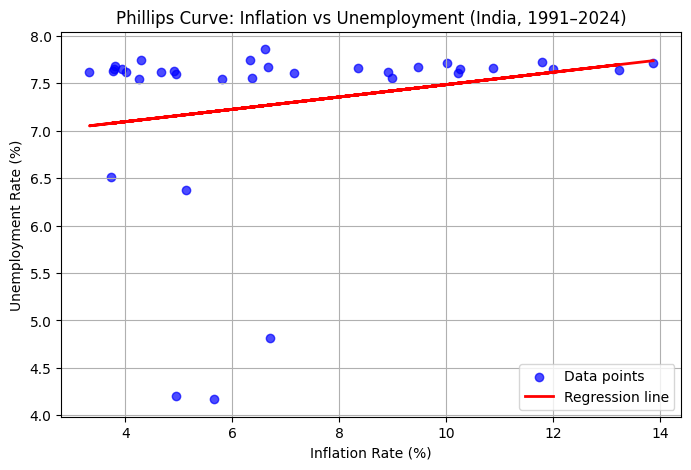

In [4]:
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
plt.scatter(df["Inflation"], df["Unemployment"], color='blue', alpha=0.7, label="Data points")
plt.plot(df["Inflation"], model.predict(X), color='red', linewidth=2, label="Regression line")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.title("Phillips Curve: Inflation vs Unemployment (India, 1991–2024)")
plt.legend()
plt.grid(True)

### Economic Interpretation

The regression results indicate no strong evidence of a Phillips curve relationship for India during 1991–2024. The positive but insignificant coefficient suggests that inflation and unemployment moved largely independently in this period. This can be explained by India's large informal labor market, persistent structural unemployment, and frequent supply-side inflation shocks (e.g., food prices, oil imports) that raise prices without boosting employment. Policy measures like MNREGA and subsidies may have further weakened the short-run trade-off between inflation and unemployment.
